# Latihan: Linear Regression vs Polynomial Regression (tanpa Pipeline)
Notebook ini menunjukkan cara memakai `LinearRegression` biasa dan **Polynomial Regression tanpa `Pipeline`** (manual memakai `PolynomialFeatures`).

Yang penting:
- `LinearRegression` menerima input fitur berbentuk array 2D: `(n_samples, n_features)`
- Untuk polynomial, kita ubah dulu `X` → fitur polinomial dengan `PolynomialFeatures`, lalu baru fit `LinearRegression` pada fitur hasil transformasi.

## Contoh simpel: $y = x^2 + 5x + 10$

In [6]:
# ---------- IMPORT ----------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# ---------- IMPORT ----------

# ---------- FUNCTION ----------
def debugging(key, data):
    print(f'\n{key}:\n{data}')

def persamaaKuadratNumpy(x):
    totalData = x.shape[0]
    noise = np.random.normal(0, 10, size=totalData)
    return x**2 + 5*x + 10 + noise
# ---------- FUNCTION ----------

# ---------- SETUP ----------
np.set_printoptions(precision=2, floatmode='fixed', suppress=True)
# ---------- SETUP ----------

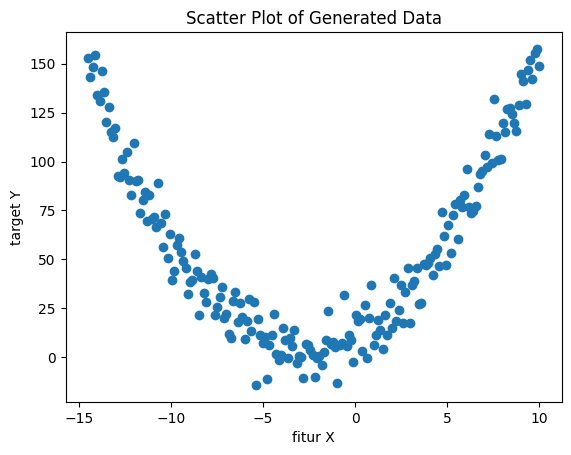

In [7]:
# ---------- STEP 1 ----------
# disini bertujuan untuk membuat data dummy X dengan Y sebanyak 200 data, dari hasil persamaan kuadrat dengan noise
# ---------------------------- 
totalData = 200

np.random.seed(42)

x_train = np.linspace(-14.5, 10, totalData)
y_train = persamaaKuadratNumpy(x_train)

# debugging('x_train', x_train)
# debugging('y_train', y_train)

plt.scatter(x_train, y_train)
plt.title('Scatter Plot of Generated Data')
plt.xlabel('fitur X')
plt.ylabel('target Y')
plt.show()
# ---------- STEP 1 ----------

In [8]:
# ---------- STEP 2 ----------
# kita buat yang sebelumnya 1 fitur dan 1 target, menjadi 2 fitur dan 1 target
# ---------------------------- 
x_train_stacked = np.column_stack((x_train, x_train**2))
# debugging('x_train_stacked', x_train_stacked)
# ---------- STEP 2 ----------

In [9]:
# ---------- STEP 3 ----------
# untuk test modal linear, dan menghasilkan y_predict
# ----------------------------
model = LinearRegression()

# model fit latihan
model.fit(x_train_stacked, y_train)
# model predict latihan
y_predict = model.predict(x_train_stacked)

debugging('Coefficients', model.coef_)
debugging('Intercept', f'{model.intercept_:.2f}')
debugging('y_predict', y_predict)
# ---------- STEP 3 ----------


Coefficients:
[5.07 1.00]

Intercept:
10.01

y_predict:
[145.74 142.83 139.94 137.09 134.27 131.47 128.71 125.98 123.27 120.60
 117.96 115.34 112.76 110.21 107.69 105.20 102.73 100.30  97.90  95.53
  93.19  90.88  88.60  86.35  84.13  81.94  79.78  77.65  75.55  73.48
  71.44  69.43  67.45  65.50  63.58  61.70  59.84  58.01  56.21  54.44
  52.71  51.00  49.32  47.68  46.06  44.47  42.92  41.39  39.89  38.43
  36.99  35.59  34.21  32.87  31.55  30.27  29.01  27.79  26.59  25.43
  24.29  23.19  22.12  21.07  20.06  19.08  18.12  17.20  16.31  15.45
  14.61  13.81  13.04  12.30  11.59  10.91  10.25   9.63   9.04   8.48
   7.95   7.45   6.98   6.54   6.13   5.75   5.40   5.08   4.79   4.54
   4.31   4.11   3.94   3.80   3.69   3.62   3.57   3.55   3.56   3.61
   3.68   3.78   3.92   4.08   4.27   4.50   4.75   5.03   5.35   5.69
   6.07   6.47   6.91   7.37   7.87   8.39   8.95   9.54  10.15  10.80
  11.48  12.18  12.92  13.69  14.48  15.31  16.17  17.06  17.97  18.92
  19.90  20.91  21.9

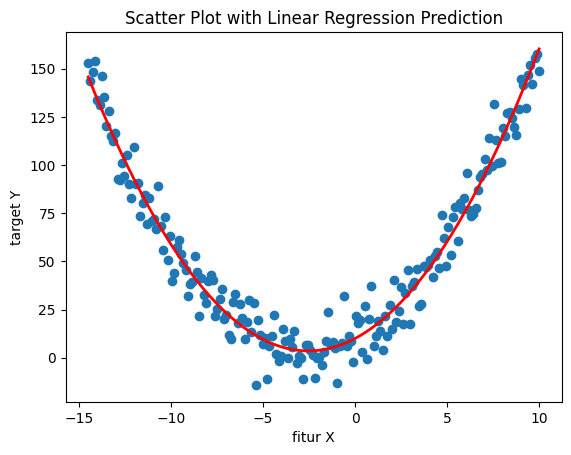

In [10]:
# ---------- STEP 4 ----------
# bertujuan untuk menggabungkan scatter (untuk data awal) dan plot (garis hasil prediksi model linear)
# ---------------------------- 
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predict, color='red', linewidth=2)
plt.title('Scatter Plot with Linear Regression Prediction')
plt.xlabel('fitur X')
plt.ylabel('target Y')
plt.show()
# ---------- STEP 4 ----------